In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: PlannerPropMax1
Current folders are:
PlannerPropMax1.0


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["production in Q", "active labor", "total labor", "active capital in Q","total capital in Q"]

In [4]:
os.chdir("../"+folder+".0")
#key info table database from rank==0
keyInfoTable=pd.read_csv('keyInfoTable.csv', header=None)

#key info table database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    keyInfoTable=keyInfoTable.add(pd.read_csv('keyInfoTable.csv', header=None))
keyInfoTable.columns=names

In [5]:
keyInfoTable

,production in Q,active labor,total labor,active capital in Q,total capital in Q
0,14707.963946,25920.0,108617.0,124956.245703,1.262757e+06
1,18267.155758,30827.0,108617.0,154672.959580,1.262757e+06
2,20496.589324,34252.0,108617.0,175716.031073,1.262757e+06
3,21816.538139,36266.0,108617.0,190033.925117,1.262757e+06
4,23804.854494,38655.0,108617.0,204796.083159,1.262757e+06
5,24483.229746,39874.0,108617.0,214760.539837,1.264080e+06
6,26886.408772,43303.0,112902.0,233455.483703,1.266116e+06
7,28558.994499,46058.0,118237.0,248556.961491,1.267370e+06
8,30178.048072,48720.0,123140.0,262664.967031,1.268123e+06
9,31962.813142,51901.0,127728.0,279142.089049,1.267596e+06


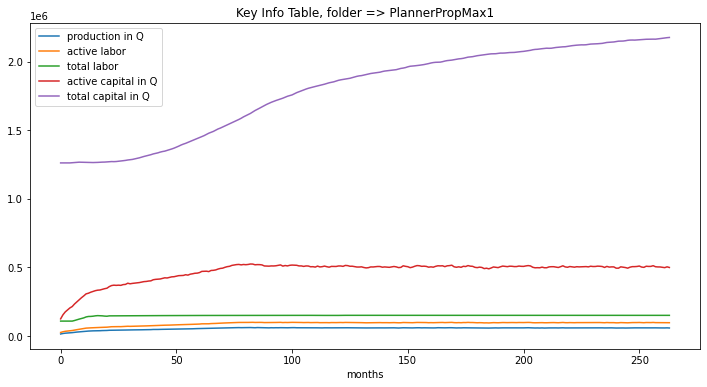

In [6]:
fig=keyInfoTable.plot(figsize=(12,6), title="Key Info Table, folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_keyInfoTable.jpg",dpi=180)

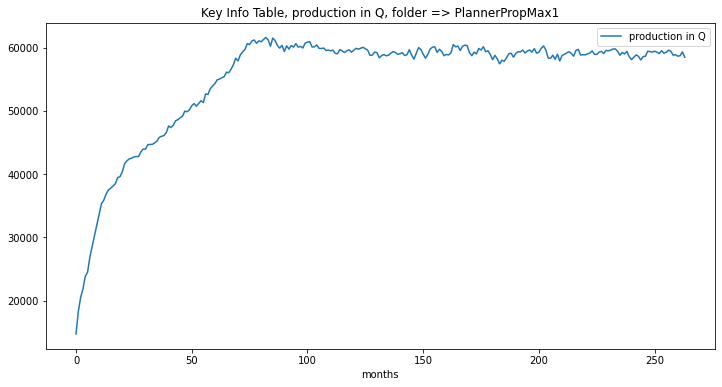

In [7]:
fig=keyInfoTable[["production in Q"]].plot(figsize=(12,6), title="Key Info Table, production in Q, folder => " + folder,\
                                           xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_keyInfoTableProductionQ.jpg",dpi=180)